In [5]:
import pandas as pd

# Define the path to the dataset
dataset_path = "C:/Users/pavan/OneDrive/Documents/MS Project/Datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/"

# Load feature names
features = pd.read_csv(dataset_path + 'features.txt', delim_whitespace=True, header=None)
feature_names = features[1].tolist()

# Ensure feature names are unique
unique_feature_names = []
for i, name in enumerate(feature_names):
    if name in unique_feature_names:
        unique_feature_names.append(name + f"_{i}")
    else:
        unique_feature_names.append(name)

# Load the train dataset
X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names)
y_train = pd.read_csv(dataset_path + 'train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])
subject_train = pd.read_csv(dataset_path + 'train/subject_train.txt', delim_whitespace=True, header=None, names=['Subject'])

# Combine the data
train_data = pd.concat([subject_train, y_train, X_train], axis=1)

# Display the first few rows
print(train_data.head())

# Check for missing values
print(train_data.isnull().sum())

# Display basic statistics
print(train_data.describe())



   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091         -0.983403         -0.990675         -0.997099   
4         -0.998139         -0.980817         -0.990482         -0.998321   

   tBodyAcc-mad()-Y  ...  fBodyBodyGyroJerkMag-mea

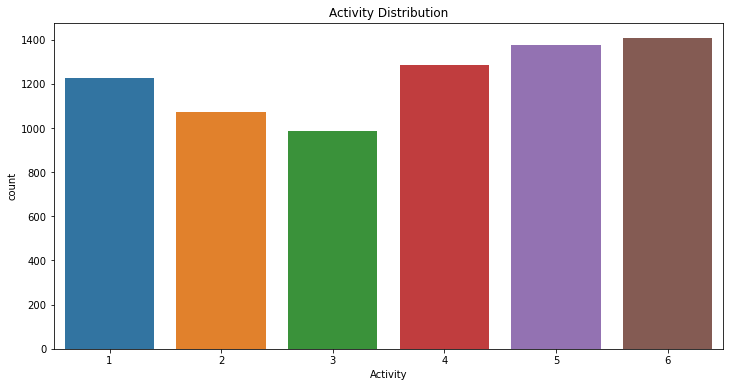

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of activity classes
plt.figure(figsize=(12, 6))
sns.countplot(x='Activity', data=train_data)
plt.title('Activity Distribution')
plt.show()


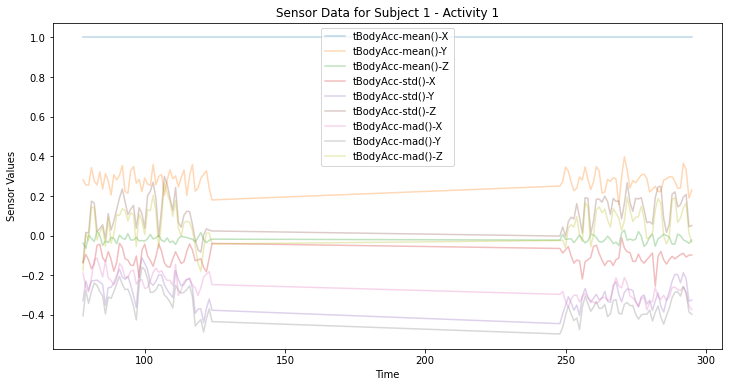

In [7]:
# Plot sensor data over time for a sample user performing a specific activity
sample_subject = train_data[train_data['Subject'] == 1]
sample_activity = sample_subject[sample_subject['Activity'] == 1]  # Replace with the activity number you want to visualize

plt.figure(figsize=(12, 6))
for i in range(1, 10):  # Plotting the first 10 features as an example
    plt.plot(sample_activity.index, sample_activity.iloc[:, i], label=unique_feature_names[i-1], alpha=0.3)

plt.title('Sensor Data for Subject 1 - Activity 1')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()


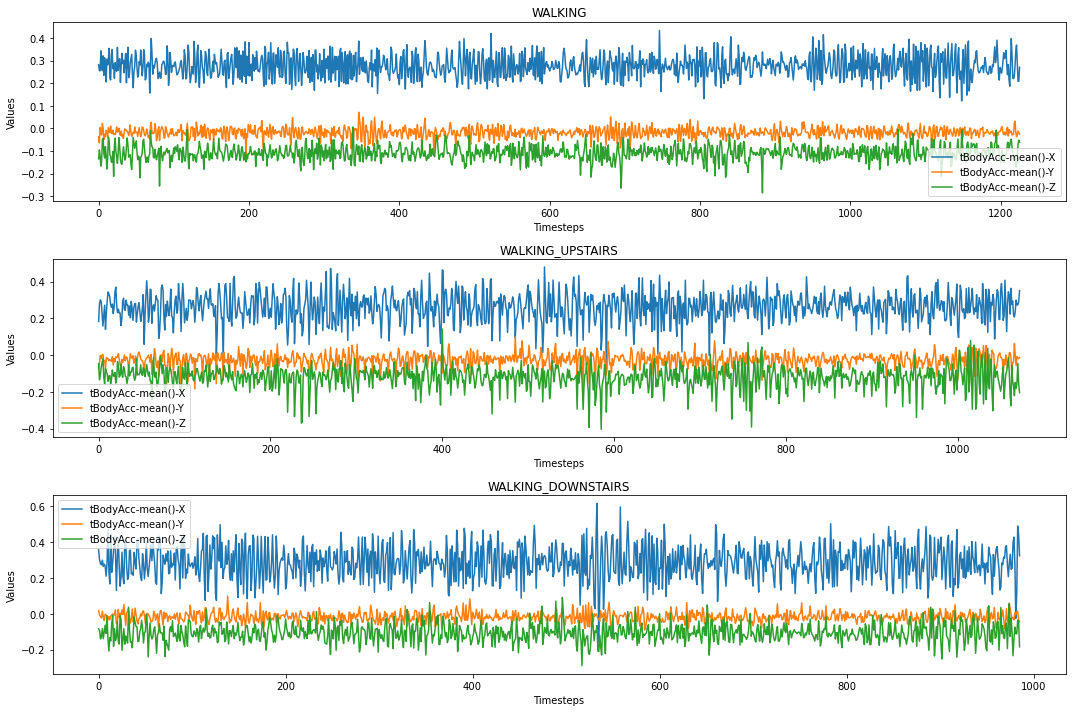

In [14]:
# Function to plot time-series data for selected features
def plot_time_series(data, features, activities):
    plt.figure(figsize=(15, 10))
    for i, activity in enumerate(activities):
        plt.subplot(len(activities), 1, i + 1)
        activity_data = data[data['Activity'] == activity]
        for feature in features:
            plt.plot(activity_data[feature].values, label=feature)
        plt.title(activity)
        plt.xlabel('Timesteps')
        plt.ylabel('Values')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Plotting time-series data for walking-related activities
features_to_plot = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
activities_to_plot = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

plot_time_series(train_data, features_to_plot, activities_to_plot)


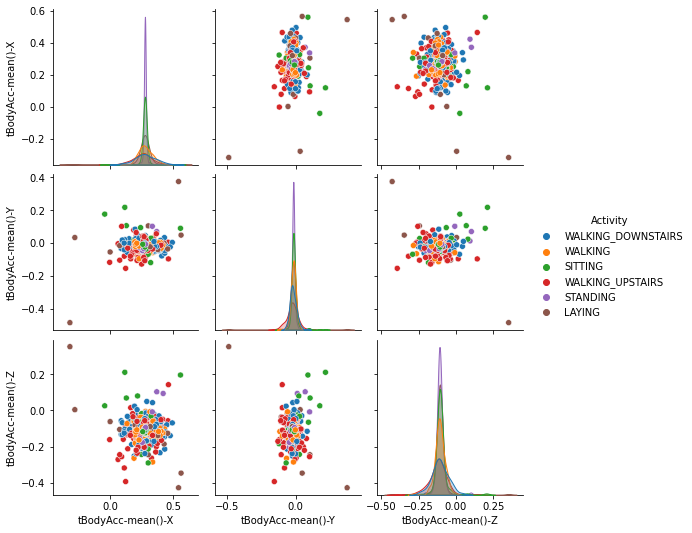

In [12]:
import seaborn as sns

# Sample a subset of data for pairplot (for performance reasons)
sample_data = train_data.sample(n=1000, random_state=42)

# Pairplot of selected features
sns.pairplot(sample_data, hue='Activity', vars=['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'])
plt.show()


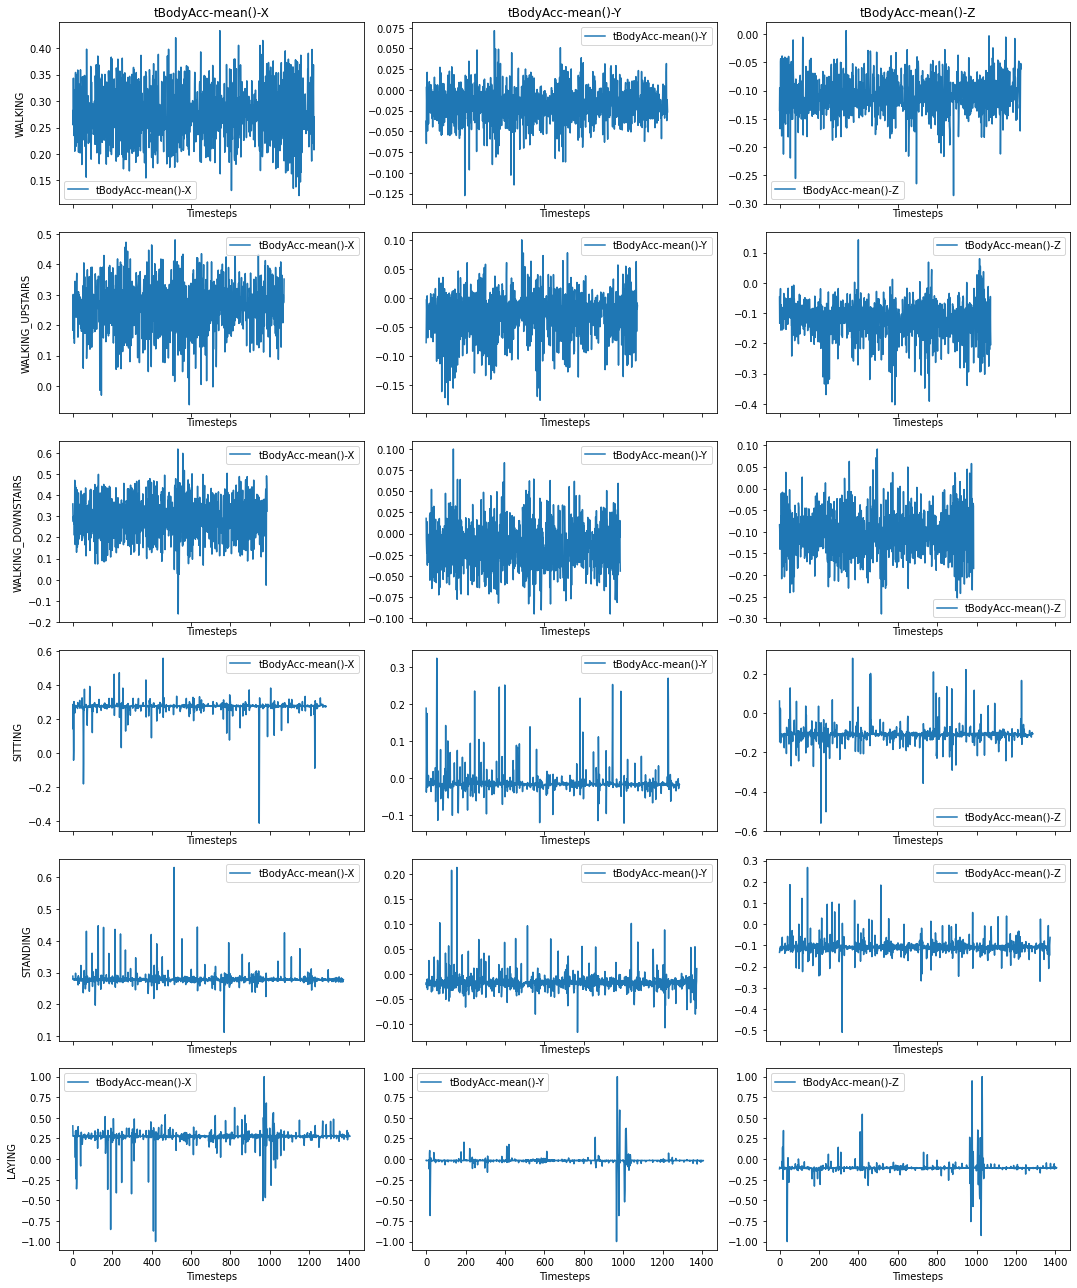

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = "C:/Users/pavan/OneDrive/Documents/MS Project/Datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/"

# Load feature names
features = pd.read_csv(dataset_path + 'features.txt', delim_whitespace=True, header=None)
feature_names = features[1].tolist()

# Ensure feature names are unique
unique_feature_names = []
for i, name in enumerate(feature_names):
    if name in unique_feature_names:
        unique_feature_names.append(name + f"_{i}")
    else:
        unique_feature_names.append(name)

# Load the train dataset
X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names)
y_train = pd.read_csv(dataset_path + 'train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])
subject_train = pd.read_csv(dataset_path + 'train/subject_train.txt', delim_whitespace=True, header=None, names=['Subject'])

# Combine the data
train_data = pd.concat([subject_train, y_train, X_train], axis=1)

# Map activity labels
activity_labels = pd.read_csv(dataset_path + 'activity_labels.txt', delim_whitespace=True, header=None, names=['ActivityID', 'Activity'])
activity_mapping = dict(zip(activity_labels.ActivityID, activity_labels.Activity))
train_data['Activity'] = train_data['Activity'].map(activity_mapping)

# Function to plot specific features for specified activities
def plot_features_for_activities(data, features, activities_to_plot):
    num_activities = len(activities_to_plot)
    num_features = len(features)
    fig, axes = plt.subplots(num_activities, num_features, figsize=(15, num_activities * 3), sharex=True)
    
    if num_activities == 1:
        axes = [axes]
    if num_features == 1:
        axes = [axes]
        
    for i, activity in enumerate(activities_to_plot):
        for j, feature in enumerate(features):
            ax = axes[i][j] if num_activities > 1 and num_features > 1 else axes[j] if num_activities > 1 else axes[i]
            sample_activity = data[data['Activity'] == activity]
            ax.plot(sample_activity[feature].values, label=feature)
            if i == 0:
                ax.set_title(feature)
            if j == 0:
                ax.set_ylabel(activity)
            ax.set_xlabel('Timesteps')
            ax.legend()
    
    plt.tight_layout()
    plt.show()

# Specify the activities to plot
activities_to_plot = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Example: Plotting Body Acceleration for selected activities
features_to_plot = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

plot_features_for_activities(train_data, features_to_plot, activities_to_plot)


In [1]:
import pandas as pd

# Define the path to the dataset
dataset_path = "C:/Users/pavan/OneDrive/Documents/MS Project/Datasets/human+activity+recognition+using+smartphones/UCI HAR Dataset/"

# Load feature names
features = pd.read_csv(dataset_path + 'features.txt', delim_whitespace=True, header=None)
feature_names = features[1].tolist()

# Ensure unique column names
unique_feature_names = []
for feature in feature_names:
    if feature not in unique_feature_names:
        unique_feature_names.append(feature)
    else:
        count = 1
        while f"{feature}_{count}" in unique_feature_names:
            count += 1
        unique_feature_names.append(f"{feature}_{count}")

# Load training data
X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names)
y_train = pd.read_csv(dataset_path + 'train/y_train.txt', delim_whitespace=True, header=None)
y_train.columns = ['Activity']

# Load test data
X_test = pd.read_csv(dataset_path + 'test/X_test.txt', delim_whitespace=True, header=None, names=unique_feature_names)
y_test = pd.read_csv(dataset_path + 'test/y_test.txt', delim_whitespace=True, header=None)
y_test.columns = ['Activity']

# Display the first few rows of the training data
X_train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [2]:
# Display summary statistics
X_train.describe()

# Check for missing values
X_train.isnull().sum()

# Display data types
X_train.dtypes


tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroMean,gravityMean)        float64
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Length: 561, dtype: object

In [3]:
# Fill missing values or drop rows/columns with missing values
X_train = X_train.fillna(method='ffill')
X_test = X_test.fillna(method='ffill')


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode activities
label_encoder = LabelEncoder()
y_train['Activity'] = label_encoder.fit_transform(y_train['Activity'])
y_test['Activity'] = label_encoder.transform(y_test['Activity'])


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X_train = X_train
y_train = y_train['Activity']
X_test = X_test
y_test = y_test['Activity']

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9256871394638616
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       496
           1       0.90      0.89      0.89       471
           2       0.97      0.87      0.91       420
           3       0.91      0.89      0.90       491
           4       0.90      0.92      0.91       532
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [6]:
import joblib

# Save the model
joblib.dump(model, 'C:/Users/pavan/OneDrive/Documents/MS Project/fitlifebot_model.pkl')


['C:/Users/pavan/OneDrive/Documents/MS Project/fitlifebot_model.pkl']